In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().system(' pip install pmdarima')
from pmdarima import auto_arima
import warnings
# warnings.filterwarnings('ignore')


In [20]:
# load csv file
df = pd.read_csv('TaTrach1.csv', parse_dates=True)
df.head()

,date,TaTrach1,TaTrach2,TaTrach3,TaTrach4,Qden
0,8/29/20 17:00,0.0,0.0,0.0,0.0,100.880
1,8/29/20 18:00,0.0,0.0,0.0,0.0,115.987
2,8/29/20 19:00,0.0,0.0,0.0,0.0,381.668
3,8/29/20 20:00,0.0,0.0,0.0,0.0,371.601
4,8/29/20 21:00,0.0,0.0,0.0,0.0,368.037


In [21]:
df.dtypes

date         object
TaTrach1    float64
TaTrach2    float64
TaTrach3    float64
TaTrach4    float64
Qden        float64
dtype: object

In [22]:
df['date'] = [pd.to_datetime(x) for x in df['date']]
df['date']

# Sắp xếp dữ liệu theo date
df.sort_values('date', inplace=True)
df.dtypes

date        datetime64[ns]
TaTrach1           float64
TaTrach2           float64
TaTrach3           float64
TaTrach4           float64
Qden               float64
dtype: object

In [23]:
''' quick overview to understand structure and basic statistics of df
+ data quality check
+ memory management  '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2248 non-null   datetime64[ns]
 1   TaTrach1  2248 non-null   float64       
 2   TaTrach2  2248 non-null   float64       
 3   TaTrach3  2248 non-null   float64       
 4   TaTrach4  2248 non-null   float64       
 5   Qden      1997 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 105.5 KB


In [24]:
# convert dtype to numeric in Qden col & replace non-numeric to NaN(not a numeric)
df['Qden'] = pd.to_numeric(df['Qden'], errors='coerce')

In [25]:
mean_value = np.mean(df['Qden'])
print("mean value của dataframe là: ",mean_value)

mean value của dataframe là:  297.1162048072108


In [26]:
# count null
df.isnull().value_counts()

date   TaTrach1  TaTrach2  TaTrach3  TaTrach4  Qden 
False  False     False     False     False     False    1997
                                               True      251
Name: count, dtype: int64

In [27]:
# replace NaN in Qden col with 107
df['Qden'] = df['Qden'].fillna(mean_value)
# provide descriptive summary of df()
df.describe()

,date,TaTrach1,TaTrach2,TaTrach3,TaTrach4,Qden
count,2248,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,2020-10-15 12:30:00.000000256,2.252415,2.294658,2.252415,2.017762,297.116205
min,2020-08-29 17:00:00,0.000000,0.000000,0.000000,0.000000,0.328000
25%,2020-09-22 02:45:00,0.000000,0.000000,0.000000,0.000000,0.452750
50%,2020-10-15 12:30:00,0.000000,0.000000,0.000000,0.000000,171.830000
75%,2020-11-07 22:15:00,0.600000,0.843085,0.600000,0.540201,297.116205
max,2020-12-01 08:00:00,75.400000,64.963079,75.400000,59.335941,4024.000000
std,NaN,7.235458,6.731612,7.235458,6.104518,511.473897


<Axes: >

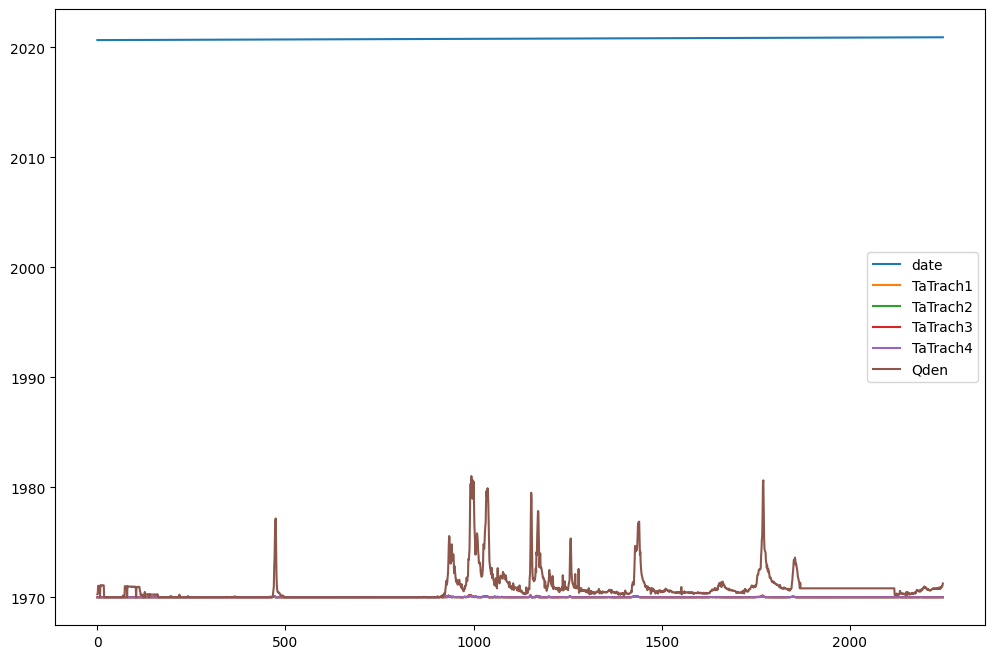

In [28]:
# create line chart with 12 inches wide and 8 inches high
df.plot(figsize=(12,8))

In [29]:
# time series analysis tool import
from statsmodels.tsa.stattools import adfuller

In [30]:
'''def find_d_value(df["date"], max_d=5):
    for d in range(1, max_d+1):
        # Kiểm định ADF
        df_diff = df.diff(d).dropna()
        result = adfuller(df_diff)

        p_value = result[1]
        adf_statistic = result[0]
        critical_values = result[4]

        print('ADF Statistic:', adf_statistic)
        print('p-value:', p_value)
        print('Critical Values:', critical_values)

        if p_value < 0.05:
            print(f'Số lần sai phân: {d}')
            break
    else:
        print('Không tìm thấy giá trị d phù hợp.')
print(find_d_value(df))'''

'def find_d_value(df["date"], max_d=5):\n    for d in range(1, max_d+1):\n        # Kiểm định ADF\n        df_diff = df.diff(d).dropna()\n        result = adfuller(df_diff)\n\n        p_value = result[1]\n        adf_statistic = result[0]\n        critical_values = result[4]\n\n        print(\'ADF Statistic:\', adf_statistic)\n        print(\'p-value:\', p_value)\n        print(\'Critical Values:\', critical_values)\n\n        if p_value < 0.05:\n            print(f\'Số lần sai phân: {d}\')\n            break\n    else:\n        print(\'Không tìm thấy giá trị d phù hợp.\')\nprint(find_d_value(df))'

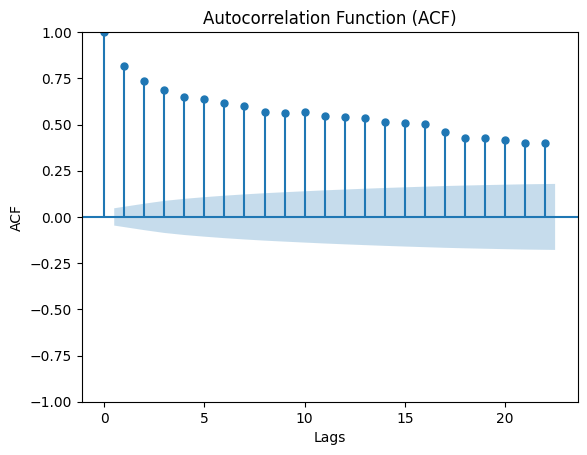

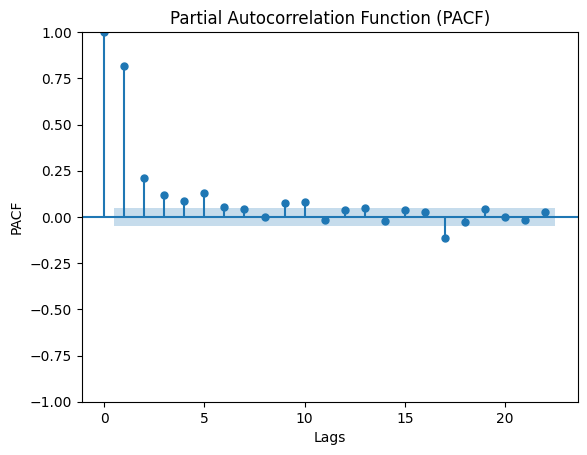

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df2 = pd.read_csv('test.csv')
df2['Qden'] = pd.to_numeric(df2['Qden'], errors='coerce')
df2['Thucdo'] = pd.to_numeric(df2['Thucdo'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.dropna(subset=['Qden', 'Thucdo', 'Date'])

# Extract the specific column for ACF and PACF analysis
qden_values = df2['Qden']
thucdo_values = df2['Thucdo']

# ACF plot
plot_acf(qden_values, lags=22)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF plot
plot_pacf(qden_values, lags=22)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [32]:
'''from statsmodels.tsa.stattools import acf
data = pd.read_csv('Tinput.csv',index_col='Date' ,thousands=',')
lags = 16
acf_values = acf(data["Qden"], nlags=lags)

import matplotlib.pyplot as plt

plt.plot(lags, acf_values)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()'''

'from statsmodels.tsa.stattools import acf\ndata = pd.read_csv(\'Tinput.csv\',index_col=\'Date\' ,thousands=\',\')\nlags = 16\nacf_values = acf(data["Qden"], nlags=lags)\n\nimport matplotlib.pyplot as plt\n\nplt.plot(lags, acf_values)\nplt.xlabel("Lag")\nplt.ylabel("Autocorrelation")\nplt.show()'

In [33]:
# augmented dickey-fuller test  
# & automatically select the number of lags to include in ADF regression
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF :", dftest[0])
  print("2. P-value :",dftest[1])
  print("3. Num of Lags :",dftest[2])
  print("4. Number of Observations User For ADF Resgessstion And Critical Values Caculation :",dftest[3])
  print("5. Critical Values :")
  for key,val in dftest[4].items():
    print("\t",key, ":", val)

In [34]:
# diff = np.diff(dataset)
# count_diff = np.count_nonzero(diff)
# print(count_diff)

In [35]:
ad_test(df['Qden'])

1. ADF : -5.39028538657952
2. P-value : 3.550028257933024e-06
3. Num of Lags : 22
4. Number of Observations User For ADF Resgessstion And Critical Values Caculation : 2225
5. Critical Values :
	 1% : -3.4332924091302055
	 5% : -2.8628398701165017
	 10% : -2.567461983133443


In [36]:
# find what model fit the most with provide df through AIC
stepwise_fit =  auto_arima(df['Qden'],trace = True,
                          supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27872.499, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28147.162, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27898.552, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27933.186, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28145.165, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27892.147, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27900.197, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27824.073, Time=2.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27823.342, Time=1.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27885.290, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27869.690, Time=1.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27899.952, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27867.698, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=27821.079, Time=2.53 sec
 ARIMA(5,1,2)(0,0,0

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
#split to train & test df & slicing iloc
print(df.shape)
train = df.iloc[:-235]
test = df.iloc[-235:]
print(train.shape,test.shape)

(2248, 6)
(2013, 6) (235, 6)


In [40]:
arima_model = ARIMA(df['Qden'], order=(2,1,5))
model =arima_model.fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Qden   No. Observations:                 2248
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -13895.707
Date:                Wed, 20 Mar 2024   AIC                          27807.414
Time:                        16:26:50   BIC                          27853.153
Sample:                             0   HQIC                         27824.109
                               - 2248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0722      0.072      1.007      0.314      -0.068       0.213
ar.L2          0.7472      0.061     12.299      0.000       0.628       0.866
ma.L1          0.2181      0.073      2.972      0.003       0.074       0.362
ma.L2         -0.6568      0.041    -16.195      0.000      -0.736      -0.577
ma.L3         -0.2480      0.013    -18.405      0.000      -0.274      -0.222
ma.L4         -0.2227      0.013    -17.589      0.000      -0.248      -0.198
ma.L5         -0.0539      0.018     -2.999      0.003      -0.089      -0.019
sigma2      1.383e+04    114.806    120.456      0.000    1.36e+04    1.41e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             69564.70
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.91
Prob(H) (two-sided):                  0.44   Kurtosis:                        30.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start, end = end, typ = 'levels')
print(pred)

2019-11-18     33.493440
2019-11-19     26.012154
2019-11-20     25.709679
2019-11-21     24.942412
2019-11-22     25.189456
                 ...    
2020-07-05    266.741817
2020-07-06    246.818590
2020-07-07    266.463283
2020-07-08    251.409953
2020-07-09    239.917222
Freq: D, Name: predicted_mean, Length: 235, dtype: float64


In [ ]:
pred.size

235

<Axes: xlabel='Date'>

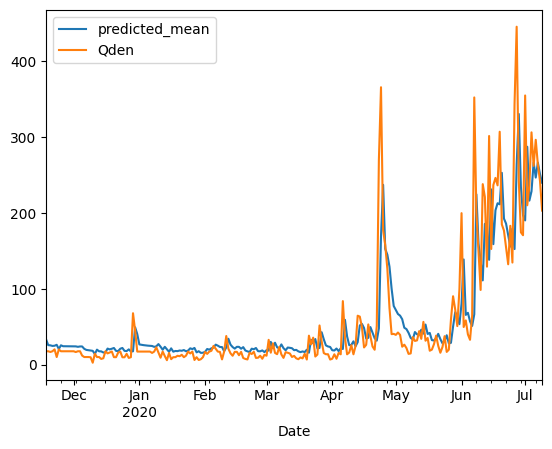

In [ ]:
pred.plot(legend = True)
test['Qden'].plot(legend = True)

In [ ]:
# mean value of Qden
test['Qden'].mean()

107.50076595744682

In [ ]:
# sdung rmse và mse để đo lường hiệu suất của mô hình dự đoán
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Qden']))
print(rmse)

73.6785723686013


In [42]:
model2 = ARIMA(df['Qden'],order=(2,0,1))
model2 = model2.fit()
df.tail()

,date,TaTrach1,TaTrach2,TaTrach3,TaTrach4,Qden
2243,2020-12-01 04:00:00,1.4,2.372933,1.4,0.945352,353.057
2244,2020-12-01 05:00:00,1.2,3.057418,1.2,0.810302,329.456
2245,2020-12-01 06:00:00,3.2,6.236731,3.2,2.160806,376.682
2246,2020-12-01 07:00:00,1.6,5.639147,1.6,1.080403,376.717
2247,2020-12-01 08:00:00,1.8,5.131560,1.8,1.215453,459.383


In [43]:
#for future date
index_future_dates = pd.date_range(start = '2022-03-01', end ='2022-04-01')
pred = model2.predict(start = len(df), end = len(df)+30, typ= 'levels').rename('ARIMA Predictions')
print(pred)


2248    480.244494
2249    482.125351
2250    475.738360
2251    466.030353
2252    455.266295
2253    444.465146
2254    434.068276
2255    424.250509
2256    415.064789
2257    406.509380
2258    398.559006
2259    391.179212
2260    384.332919
2261    377.983360
2262    372.095333
2263    366.635679
2264    361.573416
2265    356.879702
2266    352.527746
2267    348.492681
2268    344.751442
2269    341.282638
2270    338.066430
2271    335.084426
2272    332.319572
2273    329.756056
2274    327.379215
2275    325.175456
2276    323.132175
2277    321.237686
2278    319.481155
Name: ARIMA Predictions, dtype: float64


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

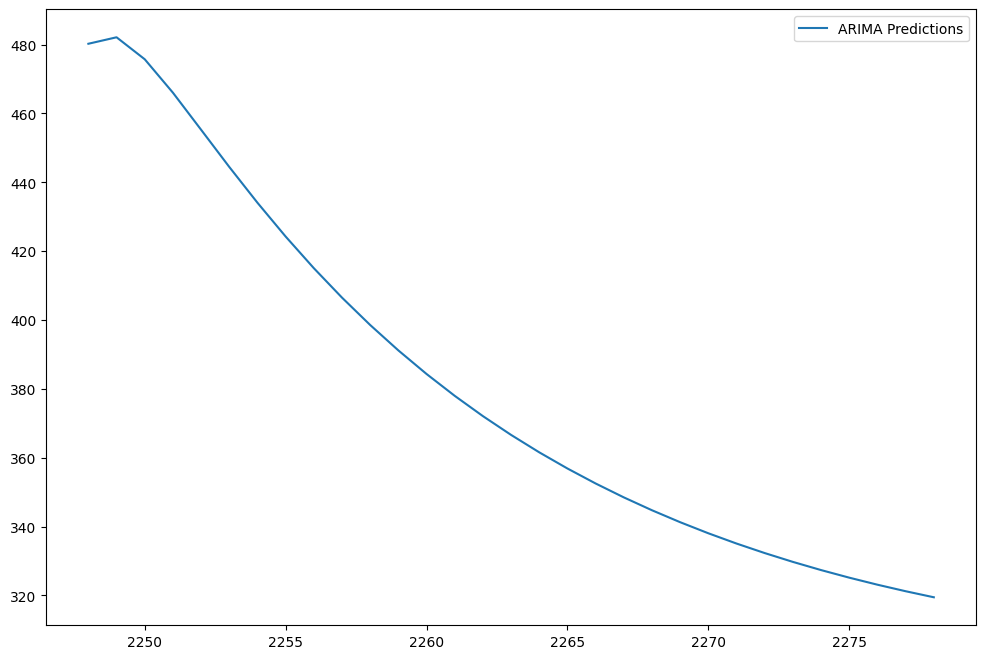

In [44]:
pred.plot(figsize=(12,8), legend= True)